# Data Mining Lab Week 3: Data Pre-processing

## Introduction 

DVH: 
P1: Q0-4 needs explanation
    Q5-8 code only
P2: Q1-5 needs explanation
    Q5-8 code only

The aim of this lab is for students to get experience with **Data Preprocessing** covered in week 3, and more specifically with the concepts of **handling missing values**, **handling noisy data**, **data normalisation**, **aggregation**, **sampling**, **discretisation**, and **principal component analysis**. 

- This lab is the first part of a **two-week assignment** that covers weeks 3 and 4.
- Your answers to the assignments at the end combined with your asnwers to the assignments in week 4 should constitute a single pdf file and submitted as your **first assignment** by **Tuesday Oct 27th at 10:00 AM**, accounting for 10% of your overall grade. Questions in this lab sheet will contribute to 5% of your overall grade; questions in the lab sheet for week 4 will cover for another 5% of your overall grade.
- <font color = 'maroon'>The last section of this notebook includes the questions that are assessed towards your final grade.</font> 

## Important notes about the assignment: 

- **PLAGIARISM** <ins>is an irreversible non-negotiable failure in the course</ins> (if in doubt of what constitutes plagiarism, ask!). 
- The total assessed coursework is worth 40% of your final grade.
- There will be 9 lab sessions and 4 assignments.
- One assignment will cover 2 consecutive lab sessions and will be worth 10 marks (percentages of your final grade).
- The deadline for submitting each coursework is 12 days after the first lab session (Tuesday).
- The submission cut-off date will be 7 days after the deadline and penalties will be applied for late submissions in accordance with the School policy on late submissions.
- You are asked to submit a **report** that should answer the questions specified in the last section of this notebook. The report should be in **PDF format** (so **NOT** *doc, docx, notebook* etc). It should be well identified with your name, student number, assignment number (for instance, Assignment 1), module, and marked with question numbers. 
- No other means of submission other than submitting your assignment through the appropriate QM+ link are acceptable at any time. Submissions sent via email will **not** be considered.
- Please name your report as follows: Assignment1-StudentName-StudentNumber.pdf
- Cases of **Extenuating Circumstances (ECs)** have to go through the proper procedure of the School in due time. Only cases approved by the School in due time can be considered.

## 1. Data Quality Issues

Poor data quality can have an adverse effect on data mining. Among the common data quality issues include noise, outliers, missing values, and duplicate data. This section presents examples of Python code to alleviate some of these data quality problems. We begin with an example dataset from the UCI machine learning repository containing information about breast cancer patients. We will first download the dataset using the Pandas read_csv() function and display its first 5 data points.

In [34]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### 1.1 Missing Values

It is not unusual for an object to be missing one or more attribute values. In some cases, the information was not collected; while in other cases, some attributes are inapplicable to the data instances. This section presents examples on the different approaches for handling missing values. 

According to the description of the data (https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original), the missing values are encoded as '?' in the original data. Our first task is to convert the missing values to NaNs. We can then count the number of missing values in each column of the data.

In [35]:
import numpy as np

data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


Observe that only the 'Bare Nuclei' column contains missing values. In the following example, the missing values in the 'Bare Nuclei' column are replaced by the median value of that column. The values before and after replacement are shown for a subset of the data points.

In [36]:
data2 = data['Bare Nuclei']

print('Before replacing missing values:')
print(data2[20:25])
data2 = data2.fillna(data2.median())

print('\nAfter replacing missing values:')
print(data2[20:25])

Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

After replacing missing values:
20    10
21     7
22     1
23     1
24     1
Name: Bare Nuclei, dtype: object


Instead of replacing the missing values, another common approach is to discard the data points that contain missing values. This can be easily accomplished by applying the dropna() function to the data frame.

In [37]:
print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 683


### 1.2 Outliers

Outliers are data instances with characteristics that are considerably different from the rest of the dataset. In the example code below, we will draw a boxplot to identify the columns in the table that contain outliers. Note that the values in all columns (except for 'Bare Nuclei') are originally stored as 'int64' whereas the values in the 'Bare Nuclei' column are stored as string objects (since the column initially contains strings such as '?' for representing missing values). Thus, we must  convert the column into numeric values first before creating the boxplot. Otherwise, the column will not be displayed when drawing the boxplot.

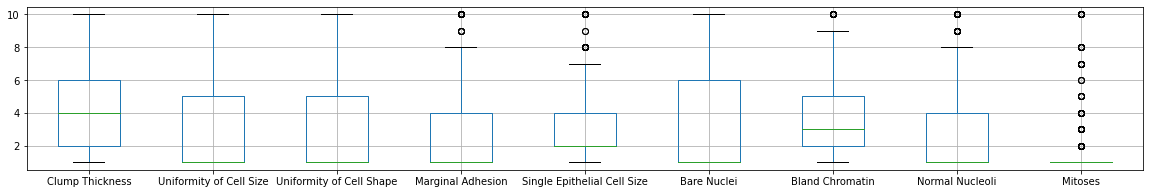

In [38]:
data2 = data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])


data2.boxplot(figsize=(20,3))

The boxplots suggest that only 5 of the columns (Marginal Adhesion, Single Epithetial Cell Size, Bland Cromatin, Normal Nucleoli, and Mitoses) contain abnormally high values. To discard the outliers, we can compute the Z-score for each attribute and remove those instances containing attributes with abnormally high or low Z-score (e.g., if Z > 3 or Z <= -3). 


The following code shows the results of standardizing the columns of the data. Note that missing values (NaN) are not affected by the standardization process.

In [39]:
data.std?

In [40]:
Z = (data2-data2.mean())/data2.std()
Z[20:25]


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


The following code shows the results of discarding columns with Z > 3 or Z <= -3.

In [41]:
print(Z.sum(axis=0))

Clump Thickness               -2.957634e-13
Uniformity of Cell Size       -3.850253e-13
Uniformity of Cell Shape      -5.995204e-14
Marginal Adhesion             -6.439294e-14
Single Epithelial Cell Size   -2.888245e-13
Bare Nuclei                    3.767542e-13
Bland Chromatin               -6.128431e-14
Normal Nucleoli               -4.790612e-14
Mitoses                        5.682121e-13
dtype: float64


In [42]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 699
Number of rows after discarding missing values = 632


In [43]:
Z.shape

(699, 9)

### 1.3 Duplicate Data

Some datasets, especially those obtained by merging multiple data sources, may contain duplicates or near duplicate instances. The term deduplication is often used to refer to the process of dealing with duplicate data issues. In the following example, we first check for duplicate instances in the breast cancer dataset.

In [44]:
dups = data.duplicated()
dups
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[11,28]]

Number of duplicate rows = 236


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1,2,1,1,2
28,2,1,1,1,2,1,2,1,1,2


The duplicated() function will return a Boolean array that indicates whether each row is a duplicate of a previous row in the table. The results suggest there are 236 duplicate rows in the breast cancer dataset. For example, the instance with row index 11 has identical attribute values as the instance with row index 28. Although such duplicate rows may correspond to samples for different individuals, in this hypothetical example, we assume that the duplicates are samples taken from the same individual and illustrate below how to remove the duplicated rows.

In [45]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data_deduplicated = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data_deduplicated.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 463


## 2. Aggregation

Data aggregation is a preprocessing task where the values of two or more objects are combined into a single object. The motivation for aggregation includes (1) reducing the size of data to be processed, (2) changing the granularity of analysis (from fine-scale to coarser-scale), and (3) improving the stability of the data.

In the example below, we will use the daily precipitation time series data for a weather station located at Detroit Metro Airport. The raw data was obtained from the Climate Data Online website (https://www.ncdc.noaa.gov/cdo-web/). The daily precipitation time series will be compared against its monthly values.

The code below will load the precipitation time series data and draw a line plot of its daily time series.

In [33]:
daily = pd.read_csv('DTW_prec (1).csv', header='infer')
daily.index = pd.to_datetime(daily['DATE'])
daily = daily['PRCP']
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title('Daily Precipitation (variance = %.4f)' % (daily.var()))

FileNotFoundError: ignored

Observe that the daily time series appear to be quite chaotic and varies significantly from one time step to another. The time series can be grouped and aggregated by month to obtain the total monthly precipitation values. The resulting time series appears to vary more smoothly compared to the daily time series.

In [ ]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Monthly Precipitation (variance = %.4f)' % (monthly.var()))

In the example below, the daily precipitation time series are grouped and aggregated by year to obtain the annual precipitation values. 

In [ ]:
annual = daily.groupby(pd.Grouper(freq='Y')).sum()
ax = annual.plot(kind='line',figsize=(15,3))
ax.set_title('Annual Precipitation (variance = %.4f)' % (annual.var()))

## 3. Sampling

Sampling is an approach commonly used to facilitate (1) data reduction for exploratory data analysis and scaling up algorithms to big data applications and (2) quantifying uncertainties due to varying data distributions. There are various methods available for data sampling, such as sampling without replacement, where each selected instance is removed from the dataset, and sampling with replacement, where each selected instance is not removed, thus allowing it to be selected more than once in the sample.

In the example below, we will apply sampling with replacement and without replacement to the breast cancer dataset obtained from the UCI machine learning repository. We initially display the first five records of the table.

In [ ]:
data.head()

In the following code, a sample of size 3 is randomly selected (without replacement) from the original data.

In [ ]:
sample = data.sample(n=3)
sample

In the next example, we randomly select 1% of the data (without replacement) and display the selected samples. The random_state argument of the function specifies the seed value of the random number generator.

In [ ]:
sample = data.sample(frac=0.01, random_state=1)
sample

Finally, we perform a sampling with replacement to create a sample whose size is equal to 1% of the entire data. You should be able to observe duplicate instances in the sample by increasing the sample size.

In [ ]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample

## 4. Discretization

Discretization is a data preprocessing step that is often used to transform a continuous-valued attribute to a categorical attribute. The example below illustrates two simple but widely-used unsupervised discretization methods (equal width and equal depth) applied to the 'Clump Thickness' attribute of the breast cancer dataset.

First, we plot a histogram that shows the distribution of the attribute values. The value_counts() function can also be applied to count the frequency of each attribute value.

In [ ]:
data['Clump Thickness'].hist(bins=10)
data['Clump Thickness'].value_counts(sort=False)

For the equal width method, we can apply the cut() function to discretize the attribute into 4 bins of similar interval widths. The value_counts() function can be used to determine the number of instances in each bin.

In [ ]:
bins = pd.cut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

For the equal frequency method, the qcut() function can be used to partition the values into 4 bins such that each bin has nearly the same number of instances.

In [ ]:
bins = pd.qcut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

## 5. Principal Component Analysis

Principal component analysis (PCA) is a classical method for reducing the number of attributes in the data by projecting the data from its original high-dimensional space into a lower-dimensional space. The new attributes (also known as components) created by PCA have the following properties: (1) they are linear combinations of the original attributes, (2) they are orthogonal (perpendicular) to each other, and (3) they capture the maximum amount of variation in the data.

The example below illustrates the application of PCA to an image dataset. There are 16 RGB files, each of which has a size of 111 x 111 pixels. The example code below will read each image file and convert the RGB image into a 111 x 111 x 3 = 36963 feature values. This will create a data matrix of size 16 x 36963.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

numImages = 16
fig = plt.figure(figsize=(7,7))
imgData = np.zeros(shape=(numImages,36963))

for i in range(1,numImages+1):
    filename = 'pics/Picture'+str(i)+'.jpg'
    img = mpimg.imread(filename)
    ax = fig.add_subplot(4,4,i)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i))
    imgData[i-1] = np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1]*img.shape[2])

Using PCA, the data matrix is projected to its first two principal components. The projected values of the original image data are stored in a pandas DataFrame object named projected.

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(imgData)

projected = pca.transform(imgData)
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,numImages+1))
projected['food'] = ['burger', 'burger','burger','burger','drink','drink','drink','drink',
                      'pasta', 'pasta', 'pasta', 'pasta', 'chicken', 'chicken', 'chicken', 'chicken']
projected

Finally, we draw a scatter plot to display the projected values. Observe that the images of burgers, drinks, and pastas are all projected to the same region. However, the images for fried chicken (shown as black squares in the diagram) are harder to discriminate. 

In [ ]:
import matplotlib.pyplot as plt

colors = {'burger':'b', 'drink':'r', 'pasta':'g', 'chicken':'k'}
markerTypes = {'burger':'+', 'drink':'x', 'pasta':'o', 'chicken':'s'}

for foodType in markerTypes:
    d = projected[projected['food']==foodType]
    plt.scatter(d['pc1'],d['pc2'],c=colors[foodType],s=60,marker=markerTypes[foodType])

## <font color = 'maroon'>Assignment 1 (part 1/2)</font>

1. Consider the following sales data: [2, 15, 20, 5, 1, 4, 7, 9, 10, 3, 14, 8]. Apply the following binning techniques on the data: 
  1. Equal-frequency binning
  2. Smoothing by bin means
  3. Smoothing by bin boundaries
  
  [0.5 marks out of 5]
  
  
  
2. Use the below methods to normalize the following data: [10, 20, 35, 70, 100]:
  1. min-max normalization with min=0 and max=1.
  2. z-score normalization
  3. normalization with decimal scaling.

  [0.5 marks out of 5]
  
  
3. Suppose that a hospital has kept records for the age and BMI (Body Mass Index) for 16 randomly selected individuals, with the data presented as below. Calculate the correlation coefficient for the two above attributes. Are these two attributes positively or negatively correlated? [0.5 marks out of 5]

| Age  | 23  | 23  | 27  | 27  | 39  | 41  | 47  | 49  | 52  | 54  | 54  | 56  | 57  | 58  | 58  | 60  |
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
| BMI  | 16  | 19  | 18  | 21  | 24  | 23  | 26  | 25  | 24  | 26  | 23  | 26  | 27  | 31  | 26  | 27  |


4. Patients at two hospitals, Hospital A and Hospital B, have been provided with feedback forms on patient satisfaction, with the below responses recorded. Is patient satisfaction correlated with a specific hospital? Use a chi-square test to find out, assuming a significance level of 0.001 and a corresponding chi-square significance value of 10.828. [0.5 marks out of 5]

|Rating/Hospital |Hospital A |Hospital B |
|--------------- |---------- |---------- |
|Satisfied |71 |129 |
|Dissatisfied |37 |73 |


5. Load the CSV file BL_books.csv, which includes records of books hosted at the British Library. Inspect the data and describe any issues observed with the data. Remove fields that refer to internal processes at the British Library and do not describe the books themselves (Corporate Author, Corporate Contributors, Issuance type, Former owner, Shelfmarks, Engraver). Clean data in column Date of Publication, as to remove the extra dates in square brackets (e.g. 1879 [1878] -> 1879) and convert date ranges to their start date, wherever present (e.g. 1860-63 -> 1860). [0.5 marks out of 5]


6. Load the CSV file country-income.csv which includes both numerical and categorical values. Perform data cleaning in order to replace any NaN values with the mean of the value for a given field. Then replace any categorical labels with numerical labels. Display the resulting dataset. You can use the sklearn.impute and sklearn.preprocessing packages to asssist you. [0.5 marks out of 5]


7. Load the CSV file shoesize.csv, which includes measurements of shoe size and height (in inches) for 408 subjects, both female and male. Plot the scatterplots of shoe size versus height for female and male subjects separately. Compute the Pearson's correlation coefficient of shoe size versus height for female and male subjects separately. What can be inferred by the scatterplots and computed correlation coefficients? You can implement your own formulation of the correlation coefficient or use the scipy.stats package to assist you. [1 mark out of 5]


8. Using the breast cancer dataset from section 1 of this notebook, perform Principal Component Analysis with 2 components. Compute the explained variance ratio for each component, and plot the scatterplot of all samples along the two principal components, color-coded according to the "Class" column (this column should not be used in the PCA analysis). Ensure that your data is normalized prior to performing PCA. What insights can you obtain by the explained variance ratio of each component, and by viewing the scatterplot of the principal components? [1 mark out of 5]


# Q5

In [ ]:
import os
import pandas as pd
import numpy as np
import re

In [ ]:
print(os.getcwd())

In [ ]:
BL_books = pd.read_csv('BL-books (1).csv')
BL_books.shape

In [ ]:
BL_books.head()

In [ ]:
BL_books = BL_books.drop(['Corporate Author', 'Corporate Contributors', 'Issuance type', 'Former owner', 'Shelfmarks', 'Engraver'], axis=1)

In [ ]:
pub_date = BL_books['Date of Publication']
for i, year in enumerate(pub_date):
    pub_date[i] = re.sub('\[[^0-9]*[0-9]*[^0-9]*\]', '', str(year)) #Removing numbers in brackets
    pub_date[i] = re.sub('\-[0-9]*', '', pub_date[i]) #Removing date-ranges


In [ ]:
BL_books['Date of Publication'][0:50]

# Q6

In [ ]:
c_income = pd.read_csv('country-income (1).csv')

In [ ]:
c_income[0:10]

In [ ]:
c_income.shape

In [ ]:
for column in c_income.columns:
    if(c_income[column].dtypes != 'object'):
        c_income[column].fillna(c_income[column].mean(), inplace=True)
c_income = c_income.round(1)       

In [ ]:
c_income

In [ ]:
#CAN ONLY BE RUN ONCE AFTER CSV FILE HAS BEEN READ

for column in c_income.columns:
    if(c_income[column].dtypes == 'object'):
        onehot_values = pd.get_dummies(c_income[column], prefix=column)
        c_income = pd.concat([c_income, onehot_values], axis=1)
        c_income.drop(column, axis=1, inplace=True)
c_income

# Q7

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats


In [ ]:
df = pd.read_csv('shoesize (1).csv')
print(df.head())
df.shape

In [ ]:
#Scatterplot - Shoe size vs Height MEN
idx_srs_m = np.where(df['Gender'] == 'M')[0]
shoesizes_m = df.loc[idx_srs_m, 'Size'] 
height_m = df.loc[idx_srs_m, 'Height'] 

fig = plt.figure(figsize = (12,7))
ax = fig.add_subplot(111)
ax.set_xlabel('Shoe Size')
ax.set_ylabel('Height')
ax.set_title('Shoe size vs Height in men')

ax.scatter(shoesizes_m, height_m, s=40)

In [ ]:
stats.pearsonr(shoesizes_m, height_m)

In [ ]:
#Scatterplot - Shoe size vs Height WOMEN
idx_srs_f = np.where(df['Gender'] == 'F')[0]
shoesizes_f = df.loc[idx_srs_f, 'Size'] 
height_f = df.loc[idx_srs_f, 'Height'] 

fig = plt.figure(figsize = (12,7))
ax = fig.add_subplot(111)
ax.set_xlabel('Shoe Size')
ax.set_ylabel('Height')
ax.set_title('Shoe size vs Height in women')

ax.scatter(shoesizes_f, height_f, s=40)

In [ ]:
stats.pearsonr(shoesizes_f, height_f)

# Q8

In [46]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#The data-set was pre-processed to find z-scores earlier in the notebook

#Filling the NaN values with median
for col in Z.columns:
    Z[col].fillna(Z[col].median(), inplace=True)


In [47]:
#Performing PCA, yielding the explained varience ratio
numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(Z)
print(pca.explained_variance_ratio_)

[0.65445684 0.08613786]


In [48]:
#Dimensionality reduction
projected = pca.transform(Z)
projected = pd.DataFrame(projected,columns=['pc1','pc2'])
projected['Class'] = data['Class']
projected

,pc1,pc2,Class
0,-1.453371,-0.110935,2
1,1.458617,-0.537725,2
2,-1.577632,-0.073911,2
3,1.504740,-0.563020,2
4,-1.327717,-0.090197,2
...,...,...,...
694,-1.709537,0.189020,2
695,-2.060159,0.234446,2
696,3.826172,-0.191415,4
697,2.268888,-1.118018,4


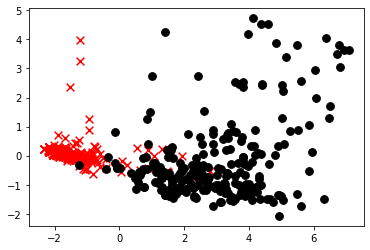

In [51]:
colors = {2:'r', 4:'k'}
markerTypes = {2:'x', 4:'o'}

for cancerType in markerTypes:
    df = projected[projected['Class']==cancerType]
    plt.scatter(df['pc1'],df['pc2'],c=colors[cancerType],s=60,marker=markerTypes[cancerType])
